In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(100,100))

%matplotlib inline

Determinar grupos para campanhas de marketing de consumidores de canais Web

## Análise da Base de Dados

In [3]:
# data set extraido de https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_public_dataset_v2.csv

compras = pd.read_csv('olist_public_dataset_v2.csv')

compras.head(5)

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [4]:
compras.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

Nesta base temos as seguintes variáveis:

* order_id - ID da Compra (alpha numérico)
* order_status - Status do Pedido (delivered, shipped, etc).
* order_products_value - Total do valor dos produtos da compra, sem o valor do frete (numérico)
* order_freight_value - Total do valor do frete
* order_items_qty - Quantidade de items da compra
* order_sellers_qty - Quantidade de vendedores da compra (cada item pode ser de um vendedor diferente)
* order_purchase_timestamp - Timestamp da compra
* order_aproved_at - Timestamp de aprovação do pagamento da compra
* order_estimated_delivery_date - Data estimada para entrega
* order_delivered_customer_date - Data de entrega
* customer_id - ID do comprador para o registro
* customer_city - Cidade do comprador
* customer_state - Estados do comprador
* customer_zip_code_prefix - Primeiros 3 digitos do CEP
* product_category_name - Categoria do principal produto comprado
* product_name_lenght - Tamanho do nome do principal produto comprado
* product_description_lenght - Tamanho da descrição do principal produto comprado
* product_photos_qty - Quantidade de fotos disponiveis do produto
* product_id - ID do produto comprado
* review_id - ID da avalização da compra
* review_score - Nota de 1 a 5 dado pelo consumidor, avaliando a compra
* review_comment_title - Titulo do comentário da avaliação do consumidor.
* review_comment_message - Mensagem com o comentário da avaliação do consumidor.
* review_creation_date - Dia da avaliação da compra
* review_answer_timestamp - Timestamp da resposta à avaliação do consumidor.

In [5]:
# Verifica algumas estatisticas da base
compras.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000
mean,129.191704,21.739202,1.100090,1.141690,353.768400,48.839630,779.020710,2.2781,4.054110
std,194.863060,20.088368,0.459189,0.708829,297.682699,10.139335,665.387848,1.7495,1.363591
min,2.000000,0.000000,1.000000,1.000000,10.000000,5.000000,8.000000,1.0000,1.000000
25%,46.990000,13.470000,1.000000,1.000000,116.000000,42.000000,340.000000,1.0000,4.000000
50%,83.650000,16.790000,1.000000,1.000000,250.000000,52.000000,591.000000,2.0000,5.000000
75%,145.900000,23.010000,1.000000,1.000000,590.000000,57.000000,978.000000,3.0000,5.000000
max,13440.000000,1562.100000,20.000000,30.000000,999.000000,72.000000,3992.000000,20.0000,5.000000


Nota-se que há valores alguns possíveis outliers na base tal como:

* Máximo valor de compra total em R\$ 13.440 sendo que a média é R\$ 129.12
* Máximo valor do frete em R\$ 1562,10 sendo que a média é de R\$ 21.73
* Máxima quantidade de items e vendedores 20 e 30 respectivamente, sendo que a média está em 1

In [6]:
compras.corr()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,review_score
order_products_value,1.000000,0.408546,0.143897,-0.040623,0.043512,0.014043,0.202337,0.041671,-0.020872
order_freight_value,0.408546,1.000000,0.409496,-0.021701,0.188085,0.002646,0.080937,-0.012479,-0.072316
order_items_qty,0.143897,0.409496,1.000000,0.000363,-0.003224,-0.020005,0.003131,-0.044022,-0.079544
order_sellers_qty,-0.040623,-0.021701,0.000363,1.000000,-0.006003,0.007521,-0.052667,-0.030985,-0.137218
customer_zip_code_prefix,0.043512,0.188085,-0.003224,-0.006003,1.000000,0.001541,0.025423,0.014820,-0.012644
product_name_lenght,0.014043,0.002646,-0.020005,0.007521,0.001541,1.000000,0.052773,0.093393,-0.007359
product_description_lenght,0.202337,0.080937,0.003131,-0.052667,0.025423,0.052773,1.000000,0.109984,0.015390
product_photos_qty,0.041671,-0.012479,-0.044022,-0.030985,0.014820,0.093393,0.109984,1.000000,0.017267
review_score,-0.020872,-0.072316,-0.079544,-0.137218,-0.012644,-0.007359,0.015390,0.017267,1.000000


Há apenas uma pequena correlação entre o valor da compra e do frete

## Filtra a base e verifica consistência dos dados

 Utiliza apenas as vendas marcadas como entregues

In [7]:
compras["order_status"].unique()

array(['delivered', 'canceled', 'shipped', 'invoiced', 'processing',
       'unavailable', 'approved'], dtype=object)

In [41]:
compras_filtrada = compras[compras["order_status"] == "delivered"]

Remove os registros com data de entrega nula

In [43]:
compras_filtrada = compras_filtrada[compras_filtrada["order_delivered_customer_date"].isnull() == False]
compras_filtrada["order_delivered_customer_date"].isnull().any()

False


Calcula a quantidade de dias entre a entrega e a relização da compra

In [44]:
from datetime import datetime

dias_entrega = list(
    map ( 
        lambda entrega, compra : 
        (
            datetime.strptime(entrega, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(compra, '%Y-%m-%d %H:%M:%S.%f')
        ).days + 1,
        compras_filtrada["order_delivered_customer_date"],
        compras_filtrada["order_purchase_timestamp"]
    ) 
)
compras_filtrada["dias_entrega"] = dias_entrega

Filtra novamente a base utilizando apenas as colunas que serão utilizadas na analise

In [45]:
col_list = ['order_products_value', 'dias_entrega', 'product_category_name', 'review_score']

In [46]:
#filtrar apenas as colunas necessarias
compras_filtrada = compras_filtrada[col_list]
compras_filtrada.head(5)

,order_products_value,dias_entrega,product_category_name,review_score
0,349.90,6,beleza_saude,5
1,15.00,5,informatica_acessorios,5
2,238.90,7,automotivo,5
3,29.99,24,cama_mesa_banho,4
4,295.99,15,moveis_decoracao,5


In [47]:
compras_filtrada.describe()

,order_products_value,dias_entrega,review_score
count,97586.000000,97586.000000,97586.000000
mean,128.366437,13.285041,4.110323
std,191.181410,9.524666,1.314992
min,2.290000,1.000000,1.000000
25%,46.900000,7.000000,4.000000
50%,82.990000,11.000000,5.000000
75%,145.000000,16.000000,5.000000
max,13440.000000,210.000000,5.000000


In [48]:
#Verifica se há valores nulos
compras_filtrada.isnull().any()

order_products_value     False
dias_entrega             False
product_category_name    False
review_score             False
dtype: bool

In [49]:
cols_numericas = ["order_products_value","dias_entrega","review_score"]

#Lista as colunas que possuem valores zerados 
for col in cols_numericas: 
    vet_0 = compras_filtrada[compras_filtrada[col] == 0]
    if (len(vet_0) > 0):
       print("Coluna = " + col + " com valores zerados\n")
       print("\n")

Não há valores zerados na base

## Transforma as colunas em formato string para numérico

In [50]:
#função que mapea uma string em uma lista em um valor unico numérico
def mapear_serie(serie):
    dict_gen = {}
    valores = serie.unique()
    ordinal = 0 
    for valor in valores:
        ordinal += 1
        dict_gen[valor] = ordinal 
            
    return (dict_gen)

In [51]:
#Converte todas as colunas alfanuméricas para os seus valores ordinais
cols_alfa = ["product_category_name"]

mapa_categoria = mapear_serie(compras_filtrada[col])

for col in cols_alfa:
    mapa_ordinal = mapear_serie(compras_filtrada[col])
    compras_filtrada[col] = compras_filtrada[col].map(mapa_ordinal)

In [52]:
compras_filtrada.head(5)

,order_products_value,dias_entrega,product_category_name,review_score
0,349.90,6,1,5
1,15.00,5,2,5
2,238.90,7,3,5
3,29.99,24,4,4
4,295.99,15,5,5


## Normaliza a base

In [53]:
# funcao para normalizar os dados pela media, ou seja, a média ficará zerada
def normalize(df,colunas):
    df_aux = df.copy()
    for col in colunas:
        df_aux[col] = (df_aux[col] - df_aux[col].mean()) / (df_aux[col].max() - df_aux[col].min())
    return (df_aux) 

In [54]:
compras_filtrada = normalize(compras_filtrada,col_list)
compras_filtrada.head(5)

,order_products_value,dias_entrega,product_category_name,review_score
0,0.016486,-0.034857,-0.156355,0.222419
1,-0.008436,-0.039641,-0.142069,0.222419
2,0.008226,-0.030072,-0.127783,0.222419
3,-0.007321,0.051268,-0.113498,-0.027581
4,0.012474,0.008206,-0.099212,0.222419


## Procura e remove outliers

In [55]:
def identificacao_outlier(df, col): 
    print(col)
 
    estat = df.describe()
    #Intervalo inter-quartil
    iq = (estat[col]["75%"] - estat[col]["25%"])
    #Limite superior para outlier é 5 vezes o intervalo interquartílica acima do 75% percentil
    lim_sup = estat[col]["75%"] + 5 * iq 
    #Limite inferior para outlier é 5 vezes o intervalo interquarílica abaixo do 25% percentil
    lim_inf = estat[col]["25%"] - 5 * iq 
    #Seleciona os elementos que seguem a regra calculada acima
    vet_out_sup = df[(df[col] > lim_sup)][[col]]
    vet_out_inf = df[(df[col] < lim_inf)][[col]]
    #Se algum elemento foi selecionado, imprima
    if (len(vet_out_sup) > 0 ):
       print("Quantidade de candidatos a outliers superiores para [" + col + "]: " + str(len(vet_out_sup))) 
       print("Limite: " + str(lim_sup))
    
    if (len(vet_out_inf) > 0 ):
       print("Quantidade de candidatos a outliers inferiores para [" + col + "]: " + str(len(vet_out_inf)))
       print("Limite: " + str(lim_inf))

In [56]:
for col in cols_numericas: 
    identificacao_outlier(compras_filtrada,col)

order_products_value
Quantidade de candidatos a outliers superiores para [order_products_value]: 1813
Limite: 0.037739582363244074
dias_entrega
Quantidade de candidatos a outliers superiores para [dias_entrega]: 287
Limite: 0.22830123977505992
review_score


Há outliers para o valor do produto e dias para entrega. A seguir, esses dados são removidos.

In [57]:
compras_sem_outlier = compras_filtrada[compras_filtrada["order_products_value"] <= 0.037739582363244074]
compras_sem_outlier = compras_sem_outlier[compras_filtrada["dias_entrega"] <= 0.22830123977505992]

In [58]:
compras_sem_outlier.describe()

,order_products_value,dias_entrega,product_category_name,review_score
count,95497.000000,95497.000000,95497.000000,95497.000000
mean,-0.001370,-0.001258,-0.001468,0.001818
std,0.007289,0.039868,0.158343,0.326905
min,-0.009382,-0.058780,-0.156355,-0.777581
25%,-0.006137,-0.030072,-0.113498,-0.027581
50%,-0.003600,-0.010933,-0.056355,0.222419
75%,0.000858,0.012990,0.072217,0.222419
max,0.037564,0.228301,0.843645,0.222419


## Usando método elbow para achar o k ideal

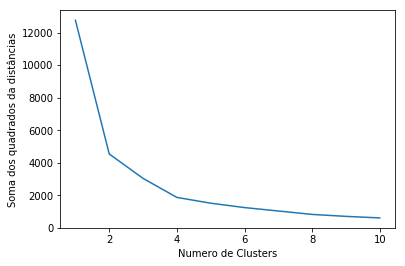

In [59]:
from sklearn.cluster import KMeans

np.random.seed(42)

square_sum = []
 
# Verifica com 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init=20)
    kmeans.fit(compras_sem_outlier.values)
    square_sum.append(kmeans.inertia_)

# plota para termos uma melhor ideia do k
plt.plot(range(1, 11), square_sum)
plt.xlabel('Numero de Clusters')
plt.ylabel('Soma dos quadrados da distâncias') #within cluster sum of squares
plt.show()

Observando o gráfico acima, percebe-se que o k ideal, quando não há mais ganho, são 4 clusters

## Gerando o k-means novamente

In [61]:
# utilizando agora o k ideal
np.random.seed(42)
compras_kmeans = KMeans(n_clusters=4, n_init=20)
compras_kmeans.fit(compras_sem_outlier.values)
pd.Series(compras_kmeans.labels_).value_counts()

0    45570
2    24561
1    12967
3    12399
dtype: int64

## Observando os resultados

In [62]:
# 0 - order_products_value
# 1 - dias_entrega
# 2 - product_category_name
# 3 - review_score

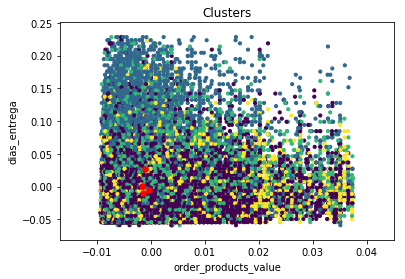

In [64]:
plt.scatter(compras_sem_outlier.values[:,0], compras_sem_outlier.values[:,1], s = 10,c = compras_kmeans.labels_)
plt.scatter(compras_kmeans.cluster_centers_[:, 0], compras_kmeans.cluster_centers_[:,1], s = 30, c = 'red',label = 'Centroids')
plt.title('Clusters')
plt.xlabel('order_products_value')
plt.ylabel('dias_entrega')

plt.show()

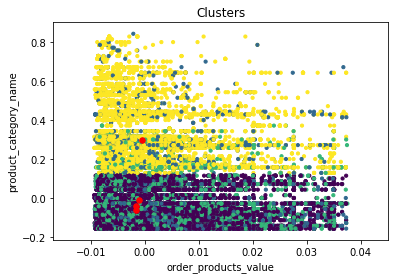

In [65]:
plt.scatter(compras_sem_outlier.values[:,0], compras_sem_outlier.values[:,2], s = 10,c = compras_kmeans.labels_)
plt.scatter(compras_kmeans.cluster_centers_[:, 0], compras_kmeans.cluster_centers_[:,2], s = 30, c = 'red',label = 'Centroids')
plt.title('Clusters')
plt.xlabel('order_products_value')
plt.ylabel('product_category_name')

plt.show()

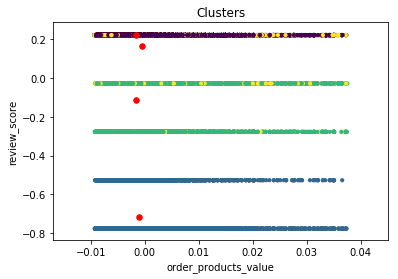

In [66]:
plt.scatter(compras_sem_outlier.values[:,0], compras_sem_outlier.values[:,3], s = 10,c = compras_kmeans.labels_)
plt.scatter(compras_kmeans.cluster_centers_[:, 0], compras_kmeans.cluster_centers_[:,3], s = 30, c = 'red',label = 'Centroids')
plt.title('Clusters')
plt.xlabel('order_products_value')
plt.ylabel('review_score')

plt.show()